In [297]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [298]:
"""
Some questions.
Big question - what is more effective - punching, kicking, or grappling?
may need to change to striking (kick, punch, elbow, knees) vs grappling

how do most fights end?
can you estimate the efficacy of punchs, kicks, guards, etc. throughout the fight, before the end?
Are some strategies more effective against certain people than others?

other ones
Who has the best record?  Most wins?  best win percentage?
Can you classify people as strikers or grapplers?
How much does height and reach matter?  That is, how much does long arms help?
In fights where there is a weight difference, how much does size matter?

Can you predict who will win a fight based on each person's record and past methods of winning?
"""

"\nSome questions.\nBig question - what is more effective - punching, kicking, or grappling?\nmay need to change to striking (kick, punch, elbow, knees) vs grappling\n\nhow do most fights end?\ncan you estimate the efficacy of punchs, kicks, guards, etc. throughout the fight, before the end?\nAre some strategies more effective against certain people than others?\n\nother ones\nWho has the best record?  Most wins?  best win percentage?\nCan you classify people as strikers or grapplers?\nHow much does height and reach matter?  That is, how much does long arms help?\nIn fights where there is a weight difference, how much does size matter?\n\nCan you predict who will win a fight based on each person's record and past methods of winning?\n"

In [299]:
ufc = pd.read_csv('ufc-master.csv')

In [300]:
ufc.shape

(4292, 110)

In [301]:
ufc.finish.head()

0      SUB
1      SUB
2    U-DEC
3      SUB
4    U-DEC
Name: finish, dtype: object

In [302]:
ufc.finish.value_counts()

U-DEC         1543
KO/TKO        1291
SUB            758
S-DEC          435
M-DEC           26
DQ              12
Overturned       2
Name: finish, dtype: int64

In [303]:
fights = pd.read_csv('raw_total_fight_data.csv', sep=';')

In [304]:
fights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5144 entries, 0 to 5143
Data columns (total 41 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   R_fighter        5144 non-null   object
 1   B_fighter        5144 non-null   object
 2   R_KD             5144 non-null   int64 
 3   B_KD             5144 non-null   int64 
 4   R_SIG_STR.       5144 non-null   object
 5   B_SIG_STR.       5144 non-null   object
 6   R_SIG_STR_pct    5144 non-null   object
 7   B_SIG_STR_pct    5144 non-null   object
 8   R_TOTAL_STR.     5144 non-null   object
 9   B_TOTAL_STR.     5144 non-null   object
 10  R_TD             5144 non-null   object
 11  B_TD             5144 non-null   object
 12  R_TD_pct         5144 non-null   object
 13  B_TD_pct         5144 non-null   object
 14  R_SUB_ATT        5144 non-null   int64 
 15  B_SUB_ATT        5144 non-null   int64 
 16  R_PASS           5144 non-null   int64 
 17  B_PASS           5144 non-null   

In [305]:
fights.describe()

,R_KD,B_KD,R_SUB_ATT,B_SUB_ATT,R_PASS,B_PASS,R_REV,B_REV,last_round
count,5144.000000,5144.000000,5144.000000,5144.000000,5144.000000,5144.000000,5144.000000,5144.000000,5144.000000
mean,0.252333,0.180404,0.510886,0.361003,1.401439,0.831260,0.141719,0.134137,2.288297
std,0.523318,0.459646,0.948139,0.809795,2.301587,1.651515,0.427448,0.416798,1.003732
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,3.000000
max,5.000000,4.000000,10.000000,7.000000,26.000000,14.000000,5.000000,3.000000,5.000000


In [306]:
fights = fights.replace(np.NaN, 'None')

In [307]:
fights['win_by'].value_counts()

Decision - Unanimous       1737
KO/TKO                     1647
Submission                 1083
Decision - Split            486
TKO - Doctor's Stoppage      70
Decision - Majority          56
Overturned                   35
DQ                           15
Could Not Continue           13
Other                         2
Name: win_by, dtype: int64

In [308]:
fights.shape

(5144, 41)

In [309]:
fights.tail()

,R_fighter,B_fighter,R_KD,B_KD,R_SIG_STR.,B_SIG_STR.,R_SIG_STR_pct,B_SIG_STR_pct,R_TOTAL_STR.,B_TOTAL_STR.,...,B_GROUND,win_by,last_round,last_round_time,Format,Referee,date,location,Fight_type,Winner
5139,Gerard Gordeau,Kevin Rosier,1,0,11 of 17,0 of 3,64%,0%,11 of 17,0 of 3,...,0 of 0,KO/TKO,1,0:59,No Time Limit,Joao Alberto Barreto,"November 12, 1993","Denver, Colorado, USA",Open Weight Bout,Gerard Gordeau
5140,Ken Shamrock,Patrick Smith,0,0,1 of 1,4 of 8,100%,50%,4 of 4,16 of 20,...,2 of 6,Submission,1,1:49,No Time Limit,Joao Alberto Barreto,"November 12, 1993","Denver, Colorado, USA",Open Weight Bout,Ken Shamrock
5141,Royce Gracie,Art Jimmerson,0,0,0 of 3,0 of 0,0%,0%,4 of 7,0 of 0,...,0 of 0,Submission,1,2:18,No Time Limit,Joao Alberto Barreto,"November 12, 1993","Denver, Colorado, USA",Open Weight Bout,Royce Gracie
5142,Kevin Rosier,Zane Frazier,2,0,15 of 27,12 of 28,55%,42%,38 of 53,13 of 29,...,2 of 2,KO/TKO,1,4:20,No Time Limit,Joao Alberto Barreto,"November 12, 1993","Denver, Colorado, USA",Open Weight Bout,Kevin Rosier
5143,Gerard Gordeau,Teila Tuli,0,0,3 of 5,0 of 1,60%,0%,3 of 5,0 of 1,...,0 of 0,KO/TKO,1,0:26,No Time Limit,Joao Alberto Barreto,"November 12, 1993","Denver, Colorado, USA",Open Weight Bout,Gerard Gordeau


In [310]:
def find_loser(row):
    if row.Winner == row.R_fighter:
        return row.B_fighter
    elif row.Winner == row.B_fighter:
        return row.R_fighter
    else:
        return 'None'

In [311]:
fights['loser'] = fights.apply(find_loser, axis=1)

In [312]:
fights[(fights.R_fighter == 'Royce Gracie') | (fights.B_fighter == 'Royce Gracie')][['Winner', 'win_by']]

,Winner,win_by
4590,Matt Hughes,KO/TKO
5099,None,Other
5107,Royce Gracie,Submission
5109,Royce Gracie,Submission
5113,Royce Gracie,Submission
5117,Royce Gracie,Submission
5121,Royce Gracie,KO/TKO
5122,Royce Gracie,Submission
5124,Royce Gracie,Submission
5128,Royce Gracie,Submission


In [313]:
rg = fights[(fights.R_fighter == 'Royce Gracie') | (fights.B_fighter == 'Royce Gracie')]

In [314]:
rg

,R_fighter,B_fighter,R_KD,B_KD,R_SIG_STR.,B_SIG_STR.,R_SIG_STR_pct,B_SIG_STR_pct,R_TOTAL_STR.,B_TOTAL_STR.,...,win_by,last_round,last_round_time,Format,Referee,date,location,Fight_type,Winner,loser
4590,Matt Hughes,Royce Gracie,0,0,32 of 40,7 of 11,80%,63%,33 of 41,14 of 18,...,KO/TKO,1,4:39,3 Rnd (5-5-5),John McCarthy,"May 27, 2006","Los Angeles, California, USA",Catch Weight Bout,Matt Hughes,Royce Gracie
5099,Ken Shamrock,Royce Gracie,0,0,10 of 22,3 of 12,45%,25%,98 of 123,355 of 366,...,Other,2,5:00,1 Rnd + OT (31-5),John McCarthy,"April 07, 1995","Charlotte, North Carolina, USA",UFC Superfight Championship Bout,None,None
5107,Royce Gracie,Dan Severn,0,0,0 of 4,4 of 7,0%,57%,80 of 84,27 of 43,...,Submission,1,15:49,No Time Limit,John McCarthy,"December 16, 1994","Tulsa, Oklahoma, USA",UFC 4 Tournament Title Bout,Royce Gracie,Dan Severn
5109,Royce Gracie,Keith Hackney,0,0,11 of 23,4 of 13,47%,30%,45 of 58,7 of 16,...,Submission,1,5:32,No Time Limit,John McCarthy,"December 16, 1994","Tulsa, Oklahoma, USA",Open Weight Bout,Royce Gracie,Keith Hackney
5113,Royce Gracie,Ron van Clief,0,0,7 of 11,0 of 2,63%,0%,27 of 31,0 of 2,...,Submission,1,3:49,No Time Limit,John McCarthy,"December 16, 1994","Tulsa, Oklahoma, USA",Open Weight Bout,Royce Gracie,Ron van Clief
5117,Royce Gracie,Kimo Leopoldo,0,0,2 of 6,6 of 9,33%,66%,17 of 21,6 of 10,...,Submission,1,4:40,No Time Limit,John McCarthy,"September 09, 1994","Charlotte, North Carolina, USA",Open Weight Bout,Royce Gracie,Kimo Leopoldo
5121,Royce Gracie,Patrick Smith,0,0,4 of 4,1 of 2,100%,50%,11 of 11,2 of 3,...,KO/TKO,1,1:17,No Time Limit,John McCarthy,"March 11, 1994","Denver, Colorado, USA",UFC 2 Tournament Title Bout,Royce Gracie,Patrick Smith
5122,Royce Gracie,Remco Pardoel,0,0,0 of 0,0 of 0,0%,0%,0 of 0,0 of 0,...,Submission,1,1:31,No Time Limit,John McCarthy,"March 11, 1994","Denver, Colorado, USA",Open Weight Bout,Royce Gracie,Remco Pardoel
5124,Royce Gracie,Jason DeLucia,0,0,0 of 0,0 of 0,0%,0%,0 of 0,0 of 0,...,Submission,1,1:07,No Time Limit,John McCarthy,"March 11, 1994","Denver, Colorado, USA",Open Weight Bout,Royce Gracie,Jason DeLucia
5128,Royce Gracie,Minoki Ichihara,0,0,2 of 4,3 of 7,50%,42%,110 of 114,12 of 16,...,Submission,1,5:08,No Time Limit,John McCarthy,"March 11, 1994","Denver, Colorado, USA",Open Weight Bout,Royce Gracie,Minoki Ichihara


In [315]:
rg[['Winner', 'win_by', 'loser']]

,Winner,win_by,loser
4590,Matt Hughes,KO/TKO,Royce Gracie
5099,None,Other,None
5107,Royce Gracie,Submission,Dan Severn
5109,Royce Gracie,Submission,Keith Hackney
5113,Royce Gracie,Submission,Ron van Clief
5117,Royce Gracie,Submission,Kimo Leopoldo
5121,Royce Gracie,KO/TKO,Patrick Smith
5122,Royce Gracie,Submission,Remco Pardoel
5124,Royce Gracie,Submission,Jason DeLucia
5128,Royce Gracie,Submission,Minoki Ichihara


In [316]:
(rg['Winner'] == 'Royce Gracie').sum()

11

In [317]:
((rg['Winner'] != 'Royce Gracie') & (rg['Winner'] != 'None')).sum()

1

In [318]:
(rg['loser'] == 'Royce Gracie').sum()

1

In [319]:
def get_record(fighter_name, fights_df = fights):
    return fights_df[(fights_df.R_fighter == fighter_name) | (fights_df.B_fighter == fighter_name)]

In [320]:
def get_record_summary(fighter_name, fights_df = fights):
    record = get_record(fighter_name, fights_df)
    summary = {}
    summary['wins'] = (fights_df['Winner'] == fighter_name).sum()
    summary['losses'] = (fights_df['Winner'] == fighter_name).sum()
    summary['losses'] = (fights_df['loser'] == fighter_name).sum()
    summary['draws'] = (((fights_df['R_fighter'] == fighter_name) | (fights_df['B_fighter'] == fighter_name) ) & (fights_df['Winner'] == 'None')).sum()
    summary['win loss ratio'] = summary ['wins'] / (summary['wins'] + summary['losses'])
    
    return summary

In [321]:
get_record('Royce Gracie')[['Winner', 'win_by']]

,Winner,win_by
4590,Matt Hughes,KO/TKO
5099,None,Other
5107,Royce Gracie,Submission
5109,Royce Gracie,Submission
5113,Royce Gracie,Submission
5117,Royce Gracie,Submission
5121,Royce Gracie,KO/TKO
5122,Royce Gracie,Submission
5124,Royce Gracie,Submission
5128,Royce Gracie,Submission


In [322]:
print(get_record_summary('Royce Gracie'))

{'wins': 11, 'losses': 1, 'draws': 1, 'win loss ratio': 0.9166666666666666}


In [323]:
print(get_record_summary('Matt Hughes'))

{'wins': 18, 'losses': 7, 'draws': 0, 'win loss ratio': 0.72}


In [324]:
get_record('Matt Hughes')[['Winner', 'loser', 'win_by']]

,Winner,loser,win_by
3441,Josh Koscheck,Matt Hughes,KO/TKO
3667,BJ Penn,Matt Hughes,KO/TKO
3742,Matt Hughes,Ricardo Almeida,Submission
3816,Matt Hughes,Renzo Gracie,KO/TKO
4029,Matt Hughes,Matt Serra,Decision - Unanimous
4231,Thiago Alves,Matt Hughes,KO/TKO
4313,Georges St-Pierre,Matt Hughes,Submission
4461,Matt Hughes,Chris Lytle,Decision - Unanimous
4502,Georges St-Pierre,Matt Hughes,KO/TKO
4536,Matt Hughes,BJ Penn,KO/TKO


In [325]:
find_loser(fights.iloc[0])

'Marlon Moraes'

In [326]:
fights.head()[['R_fighter', 'B_fighter', 'Winner']]

,R_fighter,B_fighter,Winner
0,Henry Cejudo,Marlon Moraes,Henry Cejudo
1,Valentina Shevchenko,Jessica Eye,Valentina Shevchenko
2,Tony Ferguson,Donald Cerrone,Tony Ferguson
3,Jimmie Rivera,Petr Yan,Petr Yan
4,Tai Tuivasa,Blagoy Ivanov,Blagoy Ivanov


In [327]:
for i in range(5):
    print(find_loser(fights.iloc[i]))

Marlon Moraes
Jessica Eye
Donald Cerrone
Jimmie Rivera
Tai Tuivasa


In [328]:
fights.head()[['R_fighter', 'B_fighter', 'Winner', 'loser']]

,R_fighter,B_fighter,Winner,loser
0,Henry Cejudo,Marlon Moraes,Henry Cejudo,Marlon Moraes
1,Valentina Shevchenko,Jessica Eye,Valentina Shevchenko,Jessica Eye
2,Tony Ferguson,Donald Cerrone,Tony Ferguson,Donald Cerrone
3,Jimmie Rivera,Petr Yan,Petr Yan,Jimmie Rivera
4,Tai Tuivasa,Blagoy Ivanov,Blagoy Ivanov,Tai Tuivasa


In [329]:
get_record('Matt Hughes')[['Winner', 'win_by', 'loser']]

,Winner,win_by,loser
3441,Josh Koscheck,KO/TKO,Matt Hughes
3667,BJ Penn,KO/TKO,Matt Hughes
3742,Matt Hughes,Submission,Ricardo Almeida
3816,Matt Hughes,KO/TKO,Renzo Gracie
4029,Matt Hughes,Decision - Unanimous,Matt Serra
4231,Thiago Alves,KO/TKO,Matt Hughes
4313,Georges St-Pierre,Submission,Matt Hughes
4461,Matt Hughes,Decision - Unanimous,Chris Lytle
4502,Georges St-Pierre,KO/TKO,Matt Hughes
4536,Matt Hughes,KO/TKO,BJ Penn


In [330]:
get_record('Renzo Gracie')[['Winner', 'win_by']]

,Winner,win_by
3816,Matt Hughes,KO/TKO


In [331]:
# just curious - how many fights include Gracies?
is_gracie = fights.apply(lambda row: 'gracie' in row.r_fighter.lower() or 'gracie' in row.b_fighter.lower(), axis=1)
fights[is_gracie][['r_fighter', 'b_fighter', 'winner', 'loser']]

AttributeError: 'Series' object has no attribute 'r_fighter'

In [ ]:
fights[['last_round', 'last_round_time', 'format', 'Fight_type']].head(20)

In [141]:
# Let's do some exploration of some attributes

In [332]:
fights.columns

Index(['R_fighter', 'B_fighter', 'R_KD', 'B_KD', 'R_SIG_STR.', 'B_SIG_STR.',
       'R_SIG_STR_pct', 'B_SIG_STR_pct', 'R_TOTAL_STR.', 'B_TOTAL_STR.',
       'R_TD', 'B_TD', 'R_TD_pct', 'B_TD_pct', 'R_SUB_ATT', 'B_SUB_ATT',
       'R_PASS', 'B_PASS', 'R_REV', 'B_REV', 'R_HEAD', 'B_HEAD', 'R_BODY',
       'B_BODY', 'R_LEG', 'B_LEG', 'R_DISTANCE', 'B_DISTANCE', 'R_CLINCH',
       'B_CLINCH', 'R_GROUND', 'B_GROUND', 'win_by', 'last_round',
       'last_round_time', 'Format', 'Referee', 'date', 'location',
       'Fight_type', 'Winner', 'loser'],
      dtype='object')

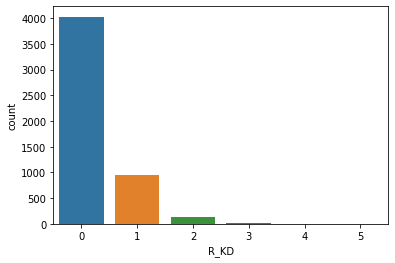

In [333]:
sns.countplot(data=fights, x='R_KD')

In [334]:
fights.R_KD.value_counts()

0    4029
1     960
2     133
3      18
5       2
4       2
Name: R_KD, dtype: int64

In [335]:
fights.B_KD.value_counts()

0    4352
1     680
2      91
3      18
4       3
Name: B_KD, dtype: int64

In [336]:
# Is the R or B player more likely to win?
# I forget, is one the favorite?

In [337]:
def winner_b_r(row):
    if row['Winner'] == row.R_fighter:
        return 'R'
    elif row['Winner'] == row.B_fighter:
        return 'B'
    else:
        return 'None'

In [338]:
fights['r_b_winner'] = fights.apply(lambda row: winner_b_r(row), axis=1)

In [339]:
fights.head()[['R_fighter', 'B_fighter', 'Winner', 'r_b_winner']]

,R_fighter,B_fighter,Winner,r_b_winner
0,Henry Cejudo,Marlon Moraes,Henry Cejudo,R
1,Valentina Shevchenko,Jessica Eye,Valentina Shevchenko,R
2,Tony Ferguson,Donald Cerrone,Tony Ferguson,R
3,Jimmie Rivera,Petr Yan,Petr Yan,B
4,Tai Tuivasa,Blagoy Ivanov,Blagoy Ivanov,B


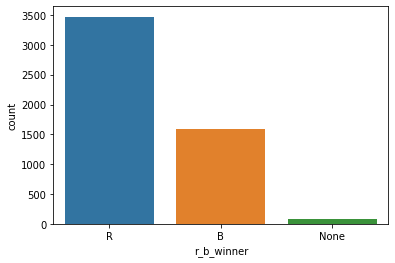

In [340]:
sns.countplot(data=fights, x="r_b_winner")

In [341]:
# looks like the R fighter usually wins.  Maybe they define it by R is the favorite, but I don't know for sure.

In [342]:
# For other columns, like strikes, etc.

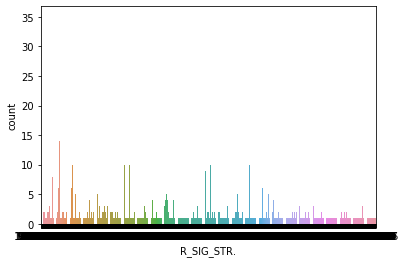

In [343]:
sns.countplot(data=fights, x="R_SIG_STR.")

In [344]:
fights['R_SIG_STR.'].head()

0     90 of 171
1       8 of 11
2    104 of 200
3     73 of 192
4     64 of 144
Name: R_SIG_STR., dtype: object

In [345]:
type(fights['R_SIG_STR_pct'].iloc[0])

str

In [346]:
# Convert X_SIG_STR_pct to a decimal 52% -> .52

In [347]:
fights.R_SIG_STR_pct = fights.R_SIG_STR_pct.str.replace('%', '').apply(lambda x: int(x))

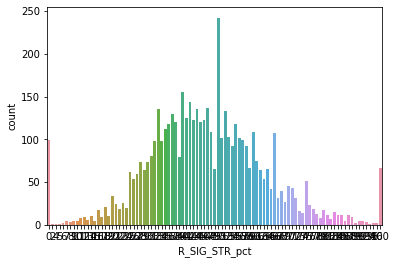

In [348]:
sns.countplot(fights.R_SIG_STR_pct)

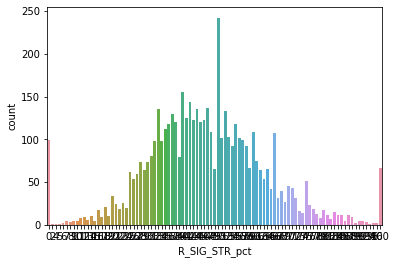

In [349]:
sns.countplot(data=fights, x='R_SIG_STR_pct')

In [350]:
# sns.countplot(fights.R_SIG_STR_pct) and sns.countplot(data=fights, x='R_SIG_STR_pct') are the same.

In [351]:
# There is one percent value that is way higher than the others.
fights.R_SIG_STR_pct.value_counts()

50    242
40    155
42    144
47    137
33    136
     ... 
89      2
5       1
2       1
94      1
4       1
Name: R_SIG_STR_pct, Length: 95, dtype: int64

In [352]:
fights.B_SIG_STR_pct = fights.B_SIG_STR_pct.str.replace('%', '').apply(lambda x: int(x))

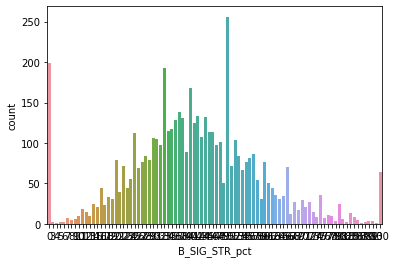

In [353]:
sns.countplot(fights.B_SIG_STR_pct)

In [354]:
fights.B_SIG_STR_pct.value_counts()

50    256
0     199
33    193
40    168
37    138
     ... 
6       2
5       2
93      1
4       1
87      1
Name: B_SIG_STR_pct, Length: 90, dtype: int64

In [357]:
fights.B_SIG_STR_pct.head()
#fights.b_sig_str_pct.head()

0    47
1    16
2    36
3    29
4    59
Name: B_SIG_STR_pct, dtype: int64

In [358]:
fights.B_SIG_STR_pct.describe()

count    5144.000000
mean       41.293546
std        18.001127
min         0.000000
25%        31.000000
50%        41.000000
75%        52.000000
max       100.000000
Name: B_SIG_STR_pct, dtype: float64

In [191]:
#50 is significantly higher for B also.

In [193]:
# compare mean values of significant strikes for R and B
print(fights.R_SIG_STR_pct.mean(), fights.B_SIG_STR_pct.mean())
# looks like R lands more strikes

46.77352255054432 41.29354587869362


In [198]:
# This is taking too long.  I want a quick look at a lot of columns.
# Make a list of columns I want to see, and do head(), value_counts(), describe() for each
fights.R_SIG_STR_pct.describe()

count    5144.000000
mean       46.773523
std        17.192006
min         0.000000
25%        36.000000
50%        46.000000
75%        57.000000
max       100.000000
Name: R_SIG_STR_pct, dtype: float64

In [ ]:
# But many columns do not lend themselves to graphing and summarization.  Many are not relevant at all.
# For example, I don't care who the referee is.  I supposed a bad ref could affect the fight, but overall I don't think it will matter.
# Things like ref, location, and a few other variables that probably don't matter and are hard to put into a graph or an ML
# algorithm I will ignore, at least for the time being.

In [203]:
columns_of_interest = []

In [238]:
columns = set(fights.columns.copy())
#columns

In [227]:
fights.columns

Index(['R_fighter', 'B_fighter', 'R_KD', 'B_KD', 'R_SIG_STR.', 'B_SIG_STR.',
       'R_SIG_STR_pct', 'B_SIG_STR_pct', 'R_TOTAL_STR.', 'B_TOTAL_STR.',
       'R_TD', 'B_TD', 'R_TD_pct', 'B_TD_pct', 'R_SUB_ATT', 'B_SUB_ATT',
       'R_PASS', 'B_PASS', 'R_REV', 'B_REV', 'R_HEAD', 'B_HEAD', 'R_BODY',
       'B_BODY', 'R_LEG', 'B_LEG', 'R_DISTANCE', 'B_DISTANCE', 'R_CLINCH',
       'B_CLINCH', 'R_GROUND', 'B_GROUND', 'win_by', 'last_round',
       'last_round_time', 'Format', 'Referee', 'date', 'location',
       'Fight_type', 'Winner', 'loser', 'r_b_winner'],
      dtype='object')

In [239]:
columns_of_interest = columns.difference(['R_fighter', 'B_fighter', 'Referee', 'date', 'location'])
#list(columns_of_interest)

In [236]:
columns_of_interest = list(fights.columns.copy())
columns_to_remove = ['R_fighter', 'B_fighter', 'Referee', 'date', 'location']
for c in columns_to_remove:
    columns_of_interest.remove(c)

In [237]:
fights[columns_of_interest].head()

,R_KD,B_KD,R_SIG_STR.,B_SIG_STR.,R_SIG_STR_pct,B_SIG_STR_pct,R_TOTAL_STR.,B_TOTAL_STR.,R_TD,B_TD,...,R_GROUND,B_GROUND,win_by,last_round,last_round_time,Format,Fight_type,Winner,loser,r_b_winner
0,0,0,90 of 171,57 of 119,52,47,99 of 182,59 of 121,1 of 4,0 of 2,...,26 of 30,1 of 1,KO/TKO,3,4:51,5 Rnd (5-5-5-5-5),UFC Bantamweight Title Bout,Henry Cejudo,Marlon Moraes,R
1,1,0,8 of 11,2 of 12,72,16,37 of 40,42 of 52,2 of 2,0 of 0,...,1 of 1,0 of 0,KO/TKO,2,0:26,5 Rnd (5-5-5-5-5),UFC Women's Flyweight Title Bout,Valentina Shevchenko,Jessica Eye,R
2,0,0,104 of 200,68 of 185,52,36,104 of 200,68 of 185,0 of 0,1 of 1,...,0 of 0,0 of 0,TKO - Doctor's Stoppage,2,5:00,3 Rnd (5-5-5),Lightweight Bout,Tony Ferguson,Donald Cerrone,R
3,0,2,73 of 192,56 of 189,38,29,76 of 195,58 of 192,0 of 3,1 of 3,...,4 of 4,4 of 10,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Bantamweight Bout,Petr Yan,Jimmie Rivera,B
4,0,1,64 of 144,73 of 123,44,59,66 of 146,81 of 131,0 of 0,2 of 2,...,0 of 0,6 of 6,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Heavyweight Bout,Blagoy Ivanov,Tai Tuivasa,B


In [241]:
# Another issue - some columns are things like "90 of 171."  I want numeric data.
# => convert each of those into three columns - 90, 171, and 90/171 = .526.  Ok, it already has a percent for X_SIG_STR.

In [261]:
fights.head()

,R_fighter,B_fighter,R_KD,B_KD,R_SIG_STR,B_SIG_STR,R_SIG_STR_pct,B_SIG_STR_pct,R_TOTAL_STR,B_TOTAL_STR,...,last_round,last_round_time,Format,Referee,date,location,Fight_type,Winner,loser,r_b_winner
0,Henry Cejudo,Marlon Moraes,0,0,90 of 171,57 of 119,52,47,99 of 182,59 of 121,...,3,4:51,5 Rnd (5-5-5-5-5),Marc Goddard,"June 08, 2019","Chicago, Illinois, USA",UFC Bantamweight Title Bout,Henry Cejudo,Marlon Moraes,R
1,Valentina Shevchenko,Jessica Eye,1,0,8 of 11,2 of 12,72,16,37 of 40,42 of 52,...,2,0:26,5 Rnd (5-5-5-5-5),Robert Madrigal,"June 08, 2019","Chicago, Illinois, USA",UFC Women's Flyweight Title Bout,Valentina Shevchenko,Jessica Eye,R
2,Tony Ferguson,Donald Cerrone,0,0,104 of 200,68 of 185,52,36,104 of 200,68 of 185,...,2,5:00,3 Rnd (5-5-5),Dan Miragliotta,"June 08, 2019","Chicago, Illinois, USA",Lightweight Bout,Tony Ferguson,Donald Cerrone,R
3,Jimmie Rivera,Petr Yan,0,2,73 of 192,56 of 189,38,29,76 of 195,58 of 192,...,3,5:00,3 Rnd (5-5-5),Kevin MacDonald,"June 08, 2019","Chicago, Illinois, USA",Bantamweight Bout,Petr Yan,Jimmie Rivera,B
4,Tai Tuivasa,Blagoy Ivanov,0,1,64 of 144,73 of 123,44,59,66 of 146,81 of 131,...,3,5:00,3 Rnd (5-5-5),Dan Miragliotta,"June 08, 2019","Chicago, Illinois, USA",Heavyweight Bout,Blagoy Ivanov,Tai Tuivasa,B


In [ ]:
# The . at the end of some column names is annoying.  Also, I don't like having them in all caps.  That is annoying to type.

In [253]:
fights = fights.rename(columns={'R_SIG_STR.': 'R_SIG_STR'})

In [259]:
cols_with_period = []
new_column_names = {}
for c in fights.columns: #columns_of_interest:
    if c.endswith('.'):
        print(c)
        cols_with_period.append(c)
        new_column_names[c] = c.replace('.', '')
new_column_names

B_SIG_STR.
R_TOTAL_STR.
B_TOTAL_STR.


{'B_SIG_STR.': 'B_SIG_STR',
 'R_TOTAL_STR.': 'R_TOTAL_STR',
 'B_TOTAL_STR.': 'B_TOTAL_STR'}

In [260]:
fights = fights.rename(columns=new_column_names)

In [262]:
fights.columns

Index(['R_fighter', 'B_fighter', 'R_KD', 'B_KD', 'R_SIG_STR', 'B_SIG_STR',
       'R_SIG_STR_pct', 'B_SIG_STR_pct', 'R_TOTAL_STR', 'B_TOTAL_STR', 'R_TD',
       'B_TD', 'R_TD_pct', 'B_TD_pct', 'R_SUB_ATT', 'B_SUB_ATT', 'R_PASS',
       'B_PASS', 'R_REV', 'B_REV', 'R_HEAD', 'B_HEAD', 'R_BODY', 'B_BODY',
       'R_LEG', 'B_LEG', 'R_DISTANCE', 'B_DISTANCE', 'R_CLINCH', 'B_CLINCH',
       'R_GROUND', 'B_GROUND', 'win_by', 'last_round', 'last_round_time',
       'Format', 'Referee', 'date', 'location', 'Fight_type', 'Winner',
       'loser', 'r_b_winner'],
      dtype='object')

In [272]:
col_names_map = {}
for column in fights.columns:
    col_names_map[column] = column.lower()
#col_names_map

In [267]:
fights = fights.rename(columns=col_names_map)

In [268]:
fights.columns

Index(['r_fighter', 'b_fighter', 'r_kd', 'b_kd', 'r_sig_str', 'b_sig_str',
       'r_sig_str_pct', 'b_sig_str_pct', 'r_total_str', 'b_total_str', 'r_td',
       'b_td', 'r_td_pct', 'b_td_pct', 'r_sub_att', 'b_sub_att', 'r_pass',
       'b_pass', 'r_rev', 'b_rev', 'r_head', 'b_head', 'r_body', 'b_body',
       'r_leg', 'b_leg', 'r_distance', 'b_distance', 'r_clinch', 'b_clinch',
       'r_ground', 'b_ground', 'win_by', 'last_round', 'last_round_time',
       'format', 'referee', 'date', 'location', 'fight_type', 'winner',
       'loser', 'r_b_winner'],
      dtype='object')

In [269]:
fights.head()

,r_fighter,b_fighter,r_kd,b_kd,r_sig_str,b_sig_str,r_sig_str_pct,b_sig_str_pct,r_total_str,b_total_str,...,last_round,last_round_time,format,referee,date,location,fight_type,winner,loser,r_b_winner
0,Henry Cejudo,Marlon Moraes,0,0,90 of 171,57 of 119,52,47,99 of 182,59 of 121,...,3,4:51,5 Rnd (5-5-5-5-5),Marc Goddard,"June 08, 2019","Chicago, Illinois, USA",UFC Bantamweight Title Bout,Henry Cejudo,Marlon Moraes,R
1,Valentina Shevchenko,Jessica Eye,1,0,8 of 11,2 of 12,72,16,37 of 40,42 of 52,...,2,0:26,5 Rnd (5-5-5-5-5),Robert Madrigal,"June 08, 2019","Chicago, Illinois, USA",UFC Women's Flyweight Title Bout,Valentina Shevchenko,Jessica Eye,R
2,Tony Ferguson,Donald Cerrone,0,0,104 of 200,68 of 185,52,36,104 of 200,68 of 185,...,2,5:00,3 Rnd (5-5-5),Dan Miragliotta,"June 08, 2019","Chicago, Illinois, USA",Lightweight Bout,Tony Ferguson,Donald Cerrone,R
3,Jimmie Rivera,Petr Yan,0,2,73 of 192,56 of 189,38,29,76 of 195,58 of 192,...,3,5:00,3 Rnd (5-5-5),Kevin MacDonald,"June 08, 2019","Chicago, Illinois, USA",Bantamweight Bout,Petr Yan,Jimmie Rivera,B
4,Tai Tuivasa,Blagoy Ivanov,0,1,64 of 144,73 of 123,44,59,66 of 146,81 of 131,...,3,5:00,3 Rnd (5-5-5),Dan Miragliotta,"June 08, 2019","Chicago, Illinois, USA",Heavyweight Bout,Blagoy Ivanov,Tai Tuivasa,B


In [273]:
del col_names_map

In [274]:
col_names_map

NameError: name 'col_names_map' is not defined

In [276]:
# OK, we lowercased the column names, so they are easier to type.
# Now where were we?  The columns with 59 out of 70 or whatever.

In [277]:
fights[columns_of_interest].head()

KeyError: "['R_TD', 'R_BODY', 'B_SIG_STR_pct', 'R_LEG', 'B_TD_pct', 'B_GROUND', 'R_TOTAL_STR.', 'B_TOTAL_STR.', 'B_TD', 'B_REV', 'Format', 'R_SIG_STR_pct', 'R_SUB_ATT', 'B_DISTANCE', 'R_DISTANCE', 'Winner', 'B_PASS', 'B_CLINCH', 'Fight_type', 'B_BODY', 'R_REV', 'R_KD', 'R_HEAD', 'B_LEG', 'R_PASS', 'R_CLINCH', 'B_KD', 'B_HEAD', 'B_SIG_STR.', 'B_SUB_ATT', 'R_GROUND', 'R_SIG_STR.', 'R_TD_pct'] not in index"

In [278]:
# Now I need to redo the columns_of_interest.
# Lesson => rename the columns earlier in the process.

In [280]:
columns_of_interest = list(fights.columns.copy())
columns_to_remove = ['r_fighter', 'b_fighter', 'referee', 'date', 'location']
for c in columns_to_remove:
    columns_of_interest.remove(c)

In [281]:
fights[columns_of_interest].head()

,r_kd,b_kd,r_sig_str,b_sig_str,r_sig_str_pct,b_sig_str_pct,r_total_str,b_total_str,r_td,b_td,...,r_ground,b_ground,win_by,last_round,last_round_time,format,fight_type,winner,loser,r_b_winner
0,0,0,90 of 171,57 of 119,52,47,99 of 182,59 of 121,1 of 4,0 of 2,...,26 of 30,1 of 1,KO/TKO,3,4:51,5 Rnd (5-5-5-5-5),UFC Bantamweight Title Bout,Henry Cejudo,Marlon Moraes,R
1,1,0,8 of 11,2 of 12,72,16,37 of 40,42 of 52,2 of 2,0 of 0,...,1 of 1,0 of 0,KO/TKO,2,0:26,5 Rnd (5-5-5-5-5),UFC Women's Flyweight Title Bout,Valentina Shevchenko,Jessica Eye,R
2,0,0,104 of 200,68 of 185,52,36,104 of 200,68 of 185,0 of 0,1 of 1,...,0 of 0,0 of 0,TKO - Doctor's Stoppage,2,5:00,3 Rnd (5-5-5),Lightweight Bout,Tony Ferguson,Donald Cerrone,R
3,0,2,73 of 192,56 of 189,38,29,76 of 195,58 of 192,0 of 3,1 of 3,...,4 of 4,4 of 10,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Bantamweight Bout,Petr Yan,Jimmie Rivera,B
4,0,1,64 of 144,73 of 123,44,59,66 of 146,81 of 131,0 of 0,2 of 2,...,0 of 0,6 of 6,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Heavyweight Bout,Blagoy Ivanov,Tai Tuivasa,B


In [282]:
fights[['r_sig_str', 'b_sig_str',
       'r_sig_str_pct', 'b_sig_str_pct', 'r_total_str', 'b_total_str', 'r_td',
       'b_td', 'r_td_pct', 'b_td_pct', 'r_sub_att', 'b_sub_att', 'r_pass',
       'b_pass', 'r_rev', 'b_rev', 'r_head', 'b_head']].head()

,r_sig_str,b_sig_str,r_sig_str_pct,b_sig_str_pct,r_total_str,b_total_str,r_td,b_td,r_td_pct,b_td_pct,r_sub_att,b_sub_att,r_pass,b_pass,r_rev,b_rev,r_head,b_head
0,90 of 171,57 of 119,52,47,99 of 182,59 of 121,1 of 4,0 of 2,25%,0%,1,0,1,0,0,0,73 of 150,35 of 89
1,8 of 11,2 of 12,72,16,37 of 40,42 of 52,2 of 2,0 of 0,100%,0%,1,0,3,0,0,0,4 of 5,0 of 7
2,104 of 200,68 of 185,52,36,104 of 200,68 of 185,0 of 0,1 of 1,0%,100%,0,0,0,0,0,0,65 of 144,43 of 152
3,73 of 192,56 of 189,38,29,76 of 195,58 of 192,0 of 3,1 of 3,0%,33%,0,0,0,1,0,0,42 of 145,40 of 166
4,64 of 144,73 of 123,44,59,66 of 146,81 of 131,0 of 0,2 of 2,0%,100%,0,0,0,0,0,0,39 of 114,65 of 114


In [284]:
fights[['r_body', 'b_body',
       'r_leg', 'b_leg', 'r_distance', 'b_distance', 'r_clinch', 'b_clinch',
       'r_ground', 'b_ground', 'win_by', 'last_round', 'last_round_time',
       'format']]

,r_body,b_body,r_leg,b_leg,r_distance,b_distance,r_clinch,b_clinch,r_ground,b_ground,win_by,last_round,last_round_time,format
0,13 of 16,7 of 8,4 of 5,15 of 22,45 of 118,54 of 116,19 of 23,2 of 2,26 of 30,1 of 1,KO/TKO,3,4:51,5 Rnd (5-5-5-5-5)
1,4 of 6,0 of 2,0 of 0,2 of 3,5 of 8,2 of 12,2 of 2,0 of 0,1 of 1,0 of 0,KO/TKO,2,0:26,5 Rnd (5-5-5-5-5)
2,25 of 37,15 of 23,14 of 19,10 of 10,103 of 198,68 of 184,1 of 2,0 of 1,0 of 0,0 of 0,TKO - Doctor's Stoppage,2,5:00,3 Rnd (5-5-5)
3,15 of 24,13 of 19,16 of 23,3 of 4,60 of 173,42 of 167,9 of 15,10 of 12,4 of 4,4 of 10,Decision - Unanimous,3,5:00,3 Rnd (5-5-5)
4,6 of 7,7 of 8,19 of 23,1 of 1,50 of 126,62 of 111,14 of 18,5 of 6,0 of 0,6 of 6,Decision - Unanimous,3,5:00,3 Rnd (5-5-5)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5139,1 of 1,0 of 1,3 of 3,0 of 1,5 of 8,0 of 3,0 of 0,0 of 0,6 of 9,0 of 0,KO/TKO,1,0:59,No Time Limit
5140,0 of 0,1 of 1,0 of 0,2 of 3,0 of 0,1 of 1,0 of 0,1 of 1,1 of 1,2 of 6,Submission,1,1:49,No Time Limit
5141,0 of 0,0 of 0,0 of 2,0 of 0,0 of 3,0 of 0,0 of 0,0 of 0,0 of 0,0 of 0,Submission,1,2:18,No Time Limit
5142,3 of 4,3 of 6,0 of 0,2 of 3,4 of 10,0 of 7,4 of 9,10 of 19,7 of 8,2 of 2,KO/TKO,1,4:20,No Time Limit


In [285]:
composite_column_roots = ['sig_str']